1
Activities Session 4

For each of the next activities, create a new code cell and write your solution.
For these activities you will need the file data_session_4_activities.xlsx, which contain 5
different sheets: data1, data2, …, data5.

1. Open the file data_session_4_activities.xlsx and load the data for sheets data1, … to
data5 in pandas dataframes called df1, df2, … df4.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [5]:

# Load all sheets from the Excel file into a dictionary of DataFrames
file_path = "./4.8_data_session_4_activities.xlsx"
xls = pd.ExcelFile(file_path)
dfs = {}

for sheet_name in xls.sheet_names:
    dfs[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

# Now, dfs dictionary contains DataFrames for each sheet
# You can access them like dfs["Sheet1"], dfs["Sheet2"], etc.

# Example: Display the first few rows of each DataFrame
for sheet_name, df in dfs.items():
    print(f"DataFrame '{sheet_name}':")
    #print(df.head())


DataFrame 'data1':
DataFrame 'data2':
DataFrame 'data3':
DataFrame 'data4':
DataFrame 'data5':


In [6]:
df1 = dfs['data1']
df2 = dfs['data2']
df3 = dfs['data3']
df4 = dfs['data4']
df5 = dfs['data5']

2. Decide which type of model is more appropriate for dataset in data1 and make a regression
model in Python. Give the equation of the model and plot on the same graph the data points
‘as a scatter plot’ and the model line.

In [7]:
df1.head()

,Cost,Revenue
0,10,-36.106973
1,13,-80.692584
2,21,-160.349575
3,17,-113.562310
4,16,-109.126017


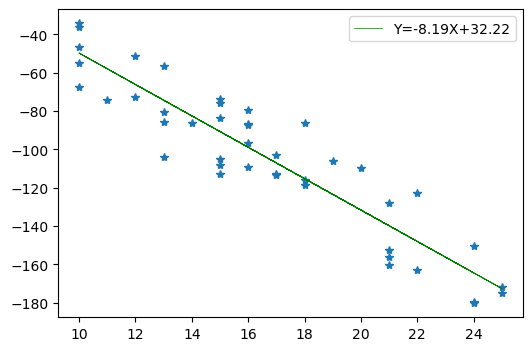

The equation for this model is: Y=-8.19X+32.22


In [8]:
X = df1.Cost.values.reshape(-1, 1)
Y = df1.Revenue.values     

mymodel =  LinearRegression().fit(X, Y)
a = mymodel.coef_[0]
b = mymodel.intercept_

text= 'Y='+str(round(a,2))+'X''+'+str(round(b,2))

Y_pred=mymodel.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,Y, '*')
plt.plot(X,Y_pred, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()
print("The equation for this model is:", text)


In [9]:
correlation_coefficient = np.corrcoef(df1['Cost'], df1['Revenue'])[0, 1]
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.9260116455360186


3. According to your model, what would be the most likely value for the Revenue if the Cost
variable is reduced to 5?

In [65]:
# Assuming you already have the linear regression model fitted
cost = 5  # Cost variable value

# Predict Revenue
revenue_predicted = mymodel.predict([[cost]])[0]
print("Predicted Revenue:", revenue_predicted)


Predicted Revenue: -8.747938158548862


4. Is predicting the Revenue for a Cost of 5 interpolation or extrapolation?

Ans: The minimum value of Cost is 10, and the maximum value is 25. Since 5 is less than the minimum observed value of Cost (10), predicting the Revenue for a Cost of 5 would indeed be extrapolation.

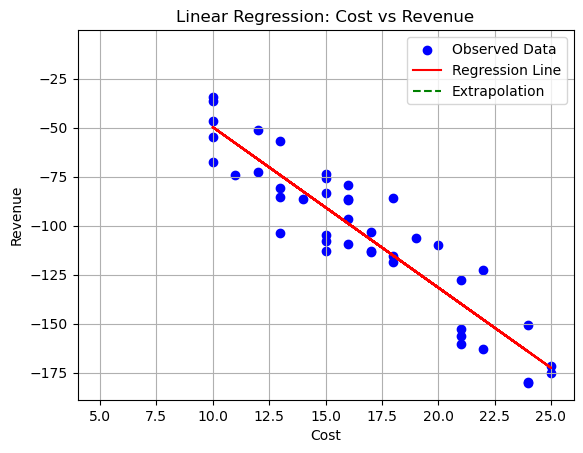

In [66]:

# Plot the observed data points
plt.scatter(X, Y, color='blue', label='Observed Data')

# Plot the regression line
plt.plot(X, mymodel.predict(X), color='red', label='Regression Line')

# Extend the regression line beyond the observed range of Cost values
extrapolated_x = [[5]]
extrapolated_y = mymodel.predict(extrapolated_x)
plt.plot(extrapolated_x, extrapolated_y, linestyle='--', color='green', label='Extrapolation')

# Add labels and legend
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Linear Regression: Cost vs Revenue')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


5. Decide which type of model is more appropriate for dataset in data2 and make a regression
model in Python. Give the equation of the model and plot on the same graph the data points
‘as a scatter plot’ and the model line.

In [67]:
df2.head()

,X,Y
0,-20,-221.868327
1,-20,-134.925645
2,-18,402.587117
3,-18,273.587409
4,-17,98.217807


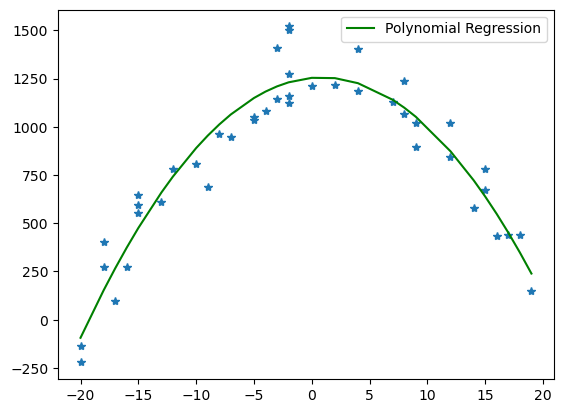

Equation of the polynomial regression model:
Y = 1253.70 + 5.44X + -3.10X^2


In [68]:
X = df2.X.values.reshape(-1, 1)
Y = df2.Y.values     
plt.plot(X,Y,'*')
X_expanded = np.concatenate([X, X**2], axis=1)
mymodel=LinearRegression().fit(X_expanded, Y)
Y_pred = mymodel.predict(X_expanded)

plt.plot(X,Y_pred, '-g',label='Polynomial Regression')

#coefficients and intercept
coefficients = mymodel.coef_
intercept = mymodel.intercept_
# Construct the equation of the polynomial regression model
equation = f'Y = {intercept:.2f} + {coefficients[0]:.2f}X + {coefficients[1]:.2f}X^2'

# Show legend and plot
plt.legend()
plt.show()

# Print the equation of the polynomial regression model
print("Equation of the polynomial regression model:")
print(equation)

6. According to your model, what would be the most likely value for the variable Y if the
variable X takes the value X=1?

In [69]:
# Given coefficients from the polynomial regression model
intercept = 1253.70
coefficient_X = 5.44
coefficient_X_squared = -3.10

# Given value of X
X_value = 1

# Calculate Y using the polynomial regression model equation
Y_predicted = intercept + coefficient_X * X_value + coefficient_X_squared * (X_value ** 2)

# Print the predicted value of Y
print("Predicted value of Y when X =", X_value, ":", Y_predicted)


Predicted value of Y when X = 1 : 1256.0400000000002


7. Decide which type of model is more appropriate for dataset in data3 and make a regression
model in Python. Give the equation of the model and plot on the same graph the data points
‘as a scatter plot’ and the model line.

In [70]:
df3.head()

,X,Y
0,-20,231.566087
1,-20,197.598532
2,-18,137.121566
3,-18,144.082869
4,-17,45.198977


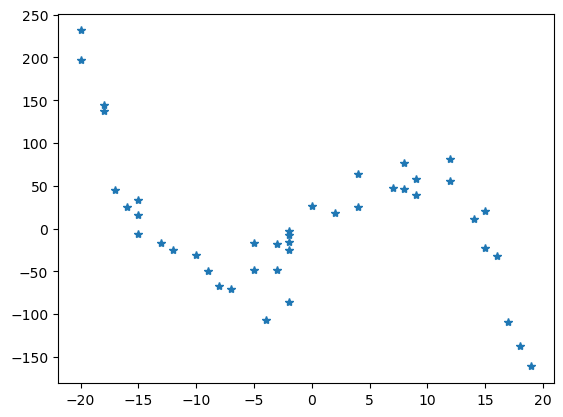

In [71]:
X = df3.X.values
Y = df3.Y.values     
plt.plot(X,Y,'*')

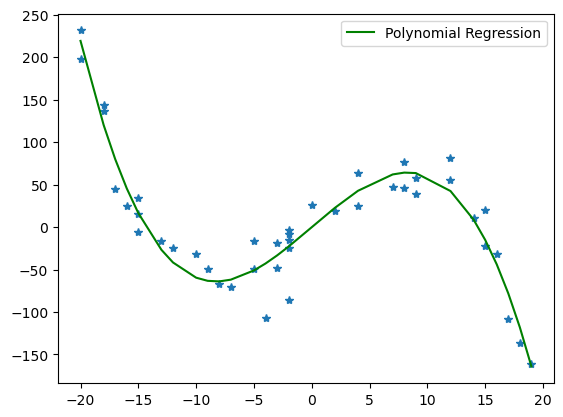

Equation of the polynomial regression model:
Y = -0.10 + 11.61X + 0.00X^2 + -0.06X^3


In [72]:
X = df3.X.values.reshape(-1, 1)
Y = df3.Y.values     
plt.plot(X,Y,'*')
X_expanded = np.concatenate([X, X**2, X**3], axis=1)
mymodel=LinearRegression().fit(X_expanded, Y)
Y_pred = mymodel.predict(X_expanded)

plt.plot(X,Y_pred, '-g',label='Polynomial Regression')

#coefficients and intercept
coefficients = mymodel.coef_
intercept = mymodel.intercept_
# Construct the equation of the polynomial regression model
equation = "Y = {:.2f} + {:.2f}X + {:.2f}X^2 + {:.2f}X^3".format(mymodel.intercept_, mymodel.coef_[0], mymodel.coef_[1], mymodel.coef_[2])

# Show legend and plot
plt.legend()
plt.show()

# Print the equation of the polynomial regression model
print("Equation of the polynomial regression model:")
print(equation)



8. Decide which type of model is more appropriate for dataset in data4 and make a regression
model in Python. Give the equation of the model and plot on the same graph the data points
‘as a scatter plot’ and the model line.

In [73]:
#lets check the dataset of sheet number 4 which i have saved in df4
df4.head()

,Time,Value
0,10,112.462252
1,13,60.287055
2,21,12.091645
3,17,29.110453
4,16,42.407856


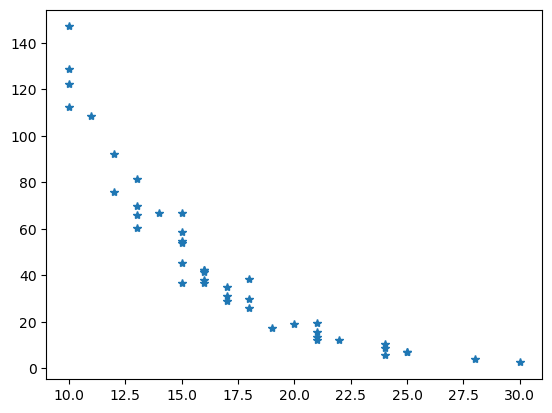

In [74]:
#now lets first check the pattern of dataset points
X = df4.Time.values.reshape(-1,1)
Y = df4.Value.values     
plt.plot(X,Y,'*')

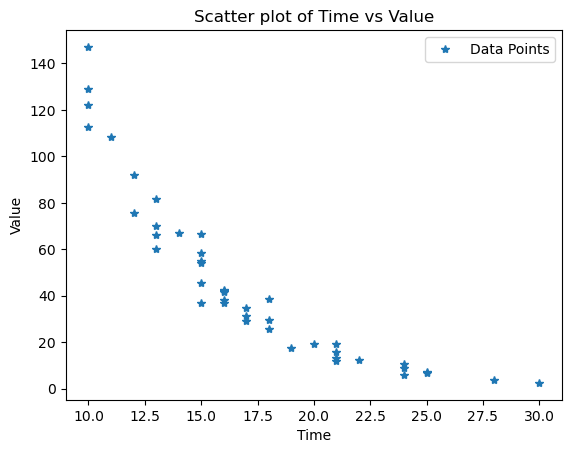

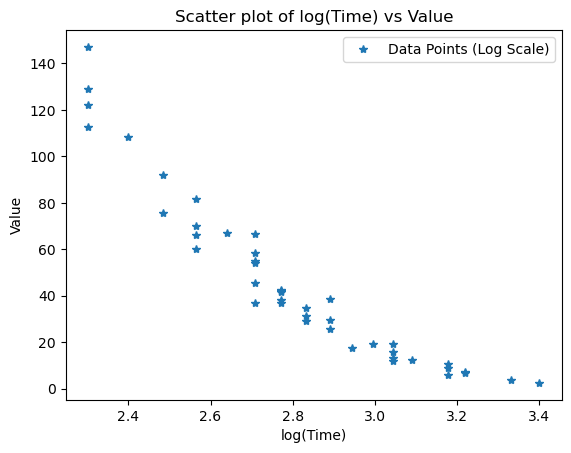

In [75]:


# Plot the data points
plt.plot(X, Y, '*', label='Data Points')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Scatter plot of Time vs Value')
plt.legend()
plt.show()

# Plot the data points on a logarithmic scale
plt.plot(np.log(X), Y, '*', label='Data Points (Log Scale)')
plt.xlabel('log(Time)')
plt.ylabel('Value')
plt.title('Scatter plot of log(Time) vs Value')
plt.legend()
plt.show()


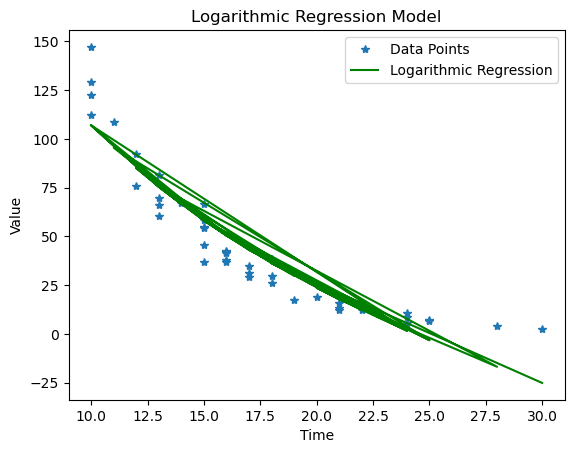

Coefficient (a) of the logarithmic regression model: -120.18452036100922
Intercept (b) of the logarithmic regression model: 383.63175969199693
Equation of the logarithmic regression model:
Y = -120.18 * log(X) + 383.63


In [76]:


# Transform X to natural logarithm scale
X_log = np.log(X)

# Fit linear regression model to the transformed data
model = LinearRegression().fit(X_log, Y)

# Get coefficients and intercept
a = model.coef_[0]
b = model.intercept_

# Predict Y values using the model
Y_pred = model.predict(X_log)

# Plot the original data points
plt.plot(X, Y, '*', label='Data Points')

# Plot the regression line
plt.plot(X, Y_pred, '-g', label='Logarithmic Regression')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Logarithmic Regression Model')
plt.legend()
plt.show()

# Print the coefficients and intercept
print("Coefficient (a) of the logarithmic regression model:", a)
print("Intercept (b) of the logarithmic regression model:", b)

# Construct the equation of the logarithmic regression model
equation = f'Y = {a:.2f} * log(X) + {b:.2f}'

# Print the equation
print("Equation of the logarithmic regression model:")
print(equation)


9. For the previous example and according to your model, what would be t

In [77]:
# Given values
Y_target = 50
a = -120.18452036100922
b = 383.63175969199693

# Calculate the time (X) at which Y is expected to be on average equal to 50
X_predicted = np.exp((b - Y_target) / -a)

print("Time at which the Value is expected to be on average equal to 50:", X_predicted)


Time at which the Value is expected to be on average equal to 50: 16.054611016767847


Decide which type of model is more appropriate for dataset in data5 and make a regression
model in Python. Give the equation of the model and make a scatter plot of the predicted
Y vs. the measured Y for each data point. What is the correlation coeﬀicient between the
real data and the predicted data

In [78]:
# lets check the dataset of sheet data5 which i have saved in df5
df5.head()

,X1,X2,X3,X4,Y
0,-1.506206,4.679429,0.299244,5.761095,-584.746335
1,-1.135300,2.240993,0.473807,7.825224,-465.576264
2,-3.892773,3.817897,1.601185,9.906461,-321.979563
3,-3.930566,5.331846,1.841158,5.938152,-570.417970
4,-1.498596,7.095678,0.870835,7.854670,-667.402329


In [84]:
X = df[['X1', 'X2', 'X3', 'X4']].values
Y = df[['Y']].values
X.shape
mymodel =  LinearRegression().fit(X, Y)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

[[-23.01840985   1.27981011  -5.66184764  -3.02507574]] [-616.0850518]


0.014852213070115305


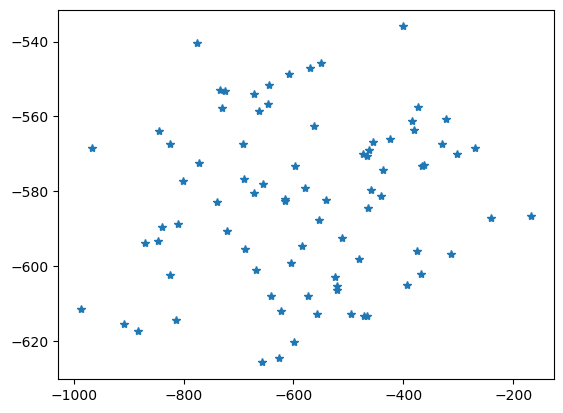

In [85]:
Y_pred = mymodel.predict(X)
plt.plot(Y, Y_pred, '*')
print(mymodel.score(X, Y))

In [ ]:
correlation_coefficient = np.corrcoef(Y, Y_pred)[0, 1]
print("Correlation coefficient between the real data and the predicted data:", correlation_coefficient)